In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("test2_result.csv")

In [12]:
df

,TRUE VALUE,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,1,47.60400,2.85800,5.74900,0.06200,7.02400,0.08700,12.62500,22.91600,0.32800,0.207900,6.174955e-02,0,7
1,1,51.78800,1.16600,2.55700,0.47500,6.80100,0.14500,14.76200,21.74300,0.32700,0.080071,1.488074e-02,1,6
2,1,46.56100,3.10900,6.13900,0.14500,6.91400,0.03700,12.47800,23.11200,0.62000,0.238984,2.320397e-02,0,7
3,1,46.34400,3.17000,7.77600,0.01400,6.84200,0.06800,11.68800,23.06700,0.57400,0.258931,4.970253e-02,0,7
4,1,50.18000,1.96500,3.29400,0.10600,5.72900,0.06300,13.60300,23.62600,0.54000,0.121500,1.933272e-02,0,0
5,-1,51.29200,0.98200,3.57300,0.60200,7.12100,0.10900,16.06400,19.34900,0.31200,0.101795,1.208946e-02,1,2
6,1,47.87100,2.55600,4.50300,0.01200,6.98700,0.06000,12.61100,23.63300,0.51000,0.183700,3.454924e-02,0,1
7,1,52.85500,1.03500,1.52300,0.94700,3.67300,0.06900,15.87000,23.19800,0.37100,0.055883,3.597478e-03,1,5
8,1,48.45500,1.85100,5.68400,0.40800,6.66800,0.07100,14.51400,21.55100,0.25900,0.192407,1.497884e-02,0,4
9,1,53.58000,0.66000,1.77000,0.24000,5.12000,0.06200,16.64000,21.89000,0.22000,0.044886,5.500000e-02,1,5


In [17]:
df2 = pd.read_excel("Test_2.xlsx")
# 只含特征值的完整数据集
data = df2.drop("TRUE VALUE", axis=1)
# 只含真实分类信息的完整数据集
labels = df2["TRUE VALUE"]

In [18]:
# data2是去掉真实分类信息的数据集（含有聚类后的结果）
data2 = df.drop("TRUE VALUE", axis=1)
data2

,SiO2 (wt. %),TiO2 (wt. %),Al2O3 (wt. %),Cr2O3 (wt. %),FeO (wt. %),MnO (wt. %),MgO (wt. %),CaO (wt. %),Na2O (wt. %),IV (Al),H2O (wt. %),km_clustering_label,ap_clustering_label
0,47.60400,2.85800,5.74900,0.06200,7.02400,0.08700,12.62500,22.91600,0.32800,0.207900,6.174955e-02,0,7
1,51.78800,1.16600,2.55700,0.47500,6.80100,0.14500,14.76200,21.74300,0.32700,0.080071,1.488074e-02,1,6
2,46.56100,3.10900,6.13900,0.14500,6.91400,0.03700,12.47800,23.11200,0.62000,0.238984,2.320397e-02,0,7
3,46.34400,3.17000,7.77600,0.01400,6.84200,0.06800,11.68800,23.06700,0.57400,0.258931,4.970253e-02,0,7
4,50.18000,1.96500,3.29400,0.10600,5.72900,0.06300,13.60300,23.62600,0.54000,0.121500,1.933272e-02,0,0
5,51.29200,0.98200,3.57300,0.60200,7.12100,0.10900,16.06400,19.34900,0.31200,0.101795,1.208946e-02,1,2
6,47.87100,2.55600,4.50300,0.01200,6.98700,0.06000,12.61100,23.63300,0.51000,0.183700,3.454924e-02,0,1
7,52.85500,1.03500,1.52300,0.94700,3.67300,0.06900,15.87000,23.19800,0.37100,0.055883,3.597478e-03,1,5
8,48.45500,1.85100,5.68400,0.40800,6.66800,0.07100,14.51400,21.55100,0.25900,0.192407,1.497884e-02,0,4
9,53.58000,0.66000,1.77000,0.24000,5.12000,0.06200,16.64000,21.89000,0.22000,0.044886,5.500000e-02,1,5


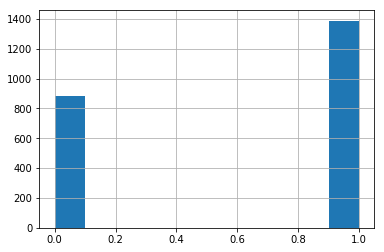

In [21]:
# 查看使用kmeans聚类后的分类标签值，两类
data2['km_clustering_label'].hist()

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# 基于kmeans聚类结果的分层抽样
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data2, data2["km_clustering_label"]):
    strat_train_set = data2.loc[train_index]
    strat_test_set = data2.loc[test_index]

In [23]:
def clustering_result_propotions(data):
    """
    分层抽样后，训练集或测试集里不同分类标签的数量比
    :param data: 训练集或测试集，纯随机取样或分层取样
    """
    return data["km_clustering_label"].value_counts() / len(data)

In [24]:
# 经过分层抽样的测试集中，不同分类标签的数量比
clustering_result_propotions(strat_test_set)

1    0.610989
0    0.389011
Name: km_clustering_label, dtype: float64

In [25]:
# 经过分层抽样的训练集中，不同分类标签的数量比
clustering_result_propotions(strat_train_set)

1    0.610897
0    0.389103
Name: km_clustering_label, dtype: float64

In [26]:
# 完整的数据集中，不同分类标签的数量比
clustering_result_propotions(data2)

1    0.610915
0    0.389085
Name: km_clustering_label, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

# 纯随机取样
random_train_set, random_test_set = train_test_split(data2, test_size=0.2, random_state=42)

# 完整的数据集、分层抽样后的测试集、纯随机抽样后的测试集中，不同分类标签的数量比
compare_props = pd.DataFrame({
    "Overall": clustering_result_propotions(data2),
    "Stratified": clustering_result_propotions(strat_test_set),
    "Random": clustering_result_propotions(random_test_set),
}).sort_index()

# 计算分层抽样和纯随机抽样后的测试集中不同分类标签的数量比，和完整的数据集中不同分类标签的数量比的误差
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Start. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Start. %error
0,0.389085,0.389011,0.382418,-1.713490,-0.018895
1,0.610915,0.610989,0.617582,1.091301,0.012034


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

def get_classification_marks(model, data, labels, train_index, test_index):
    """
    获取分类模型（二元或多元分类器）的评分：F1值
    :param data: 只含有特征值的数据集
    :param labels: 只含有标签值的数据集
    :param train_index: 分层抽样获取的训练集中数据的索引
    :param test_index: 分层抽样获取的测试集中数据的索引
    :return: F1评分值
    """
    m = model(random_state=42)
    m.fit(data.loc[train_index], labels.loc[train_index])
    test_labels_predict = m.predict(data.loc[test_index])
    score = f1_score(labels.loc[test_index], test_labels_predict, average="weighted")
    return score

In [29]:
# 用分层抽样后的训练集训练分类模型后的评分值
start_marks = get_classification_marks(LogisticRegression, data, labels, strat_train_set.index, strat_test_set.index)
start_marks

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.709029771874991

In [30]:
# 用纯随机抽样后的训练集训练分类模型后的评分值
random_marks = get_classification_marks(LogisticRegression, data, labels, random_train_set.index, random_test_set.index)
random_marks

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7059927589215087

In [51]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator, TransformerMixin

class stratified_cross_val_score(BaseEstimator, TransformerMixin):
    """实现基于分层抽样的k折交叉验证"""
    
    def __init__(self, model, data, labels, random_state=0, cv=5):
        """
        :model: 训练的模型（回归或分类）
        :data: 只含特征值的完整数据集
        :labels: 只含标签值的完整数据集
        :random_state: 模型的随机种子值
        :cv: 交叉验证的次数
        """
        self.model = model
        self.data = data
        self.labels = labels
        self.random_state = random_state
        self.cv = cv
        self.score = []  # 储存每折测试集的模型评分
        self.i = 0            
    
    def fit(self, X, y):
        """
        :param X: 含有特征值和聚类结果的完整数据集
        :param y: 含有聚类结果的完整数据集
        """
        skfolds = StratifiedKFold(n_splits=self.cv, random_state=self.random_state)

        for train_index, test_index in skfolds.split(X, y):
            # 复制要训练的模型（分类或回归）
            clone_model = clone(self.model)
            strat_X_train_folds = self.data.loc[train_index]
            strat_y_train_folds = self.labels.loc[train_index]
            strat_X_test_fold = self.data.loc[test_index]
            strat_y_test_fold = self.labels.loc[test_index]
            
            # 训练模型
            clone_model.fit(strat_X_train_folds, strat_y_train_folds)
            # 预测值（这里是分类模型的分类结果）
            test_labels_pred = clone_model.predict(strat_X_test_fold)
            
            # 这里使用的是分类模型用的F1值，如果是回归模型可以换成相应的模型
            score_fold = f1_score(labels.loc[test_index], test_labels_pred, average="weighted")
            
            # 避免重复向列表里重复添加值
            if self.i < self.cv:
                self.score.append(score_fold)
            else:
                None
                
            self.i += 1
    
    def transform(self, X, y=None):
        return self
    
    def mean(self):
        """返回交叉验证评分的平均值"""
        return np.array(self.score).mean()
    
    def std(self):
        """返回交叉验证评分的标准差"""
        return np.array(self.score).std()

In [52]:
from sklearn.linear_model import SGDClassifier

# 分类模型
clf_model = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
# 基于分层抽样的交叉验证，data是只含特征值的完整数据集，labels是只含标签值的完整数据集
clf_cross_val = stratified_cross_val_score(clf_model, data, labels, cv=5, random_state=42)
# data2是含有特征值和聚类结果的完整数据集
clf_cross_val.fit(data2, data2["km_clustering_label"])

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# 每折交叉验证的评分
clf_cross_val.score

[0.751211138417513,
 0.6227780418250951,
 0.12935004693798663,
 0.536341797966456,
 0.09408178282350468]

In [54]:
# 交叉验证评分的平均值
clf_cross_val.mean()

0.42675256159411107

In [55]:
# 交叉验证评分的标准差
clf_cross_val.std()

0.26639341601261735